In [1]:
import tensorflow as tf
import keras
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
keras.backend.set_session(sess)
from keras.preprocessing import image
from keras.applications import inception_v3 as KerasInception
from keras.applications.imagenet_utils import decode_predictions

from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import sys

Using TensorFlow backend.


In [2]:
model = KerasInception.InceptionV3()

## Test network prediction

In [3]:
def load_img_from_fn(path_list):
    imgs = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = KerasInception.preprocess_input(x)
        imgs.append(x)
    return np.vstack(imgs)

(1, 299, 299, 3)
('n02133161', 'American_black_bear', 0.63716227)
('n02105056', 'groenendael', 0.031817853)
('n02104365', 'schipperke', 0.029944101)
('n01883070', 'wombat', 0.028509347)
('n01877812', 'wallaby', 0.02509332)


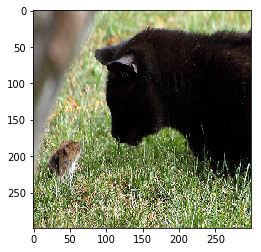

In [4]:
imgs = load_img_from_fn([os.path.join('../data', 'cat_mouse.jpg')])
print(imgs.shape)
plt.imshow(imgs[0] / 2 + 0.5)
preds = model.predict(imgs)
for x in decode_predictions(preds)[0]:
    print(x)

As we can see, the **prediction is wrong**. Thus, we will **inquire why** the network predict wrong.

## Explanation

In [5]:
%load_ext autoreload
%autoreload 2

try:
    import lime
except:
    sys.path.append('../../../')
    import lime
from lime import lime_image

In [6]:
explainer = lime_image.LimeImageExplainer()

In [10]:
%%time
explanation = explainer.explain_instance(image=imgs[0], classifier_fn=model.predict, top_labels=5, hide_color=0, num_samples=1000)

Wall time: 36.7 s


In [11]:
from skimage.segmentation import mark_boundaries

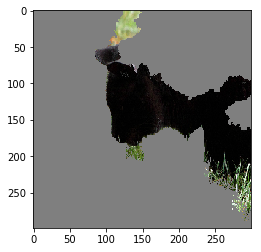

In [16]:
temp, mask = explanation.get_image_and_mask(label=295, positive_only=True, num_features=5, hide_rest=True)
# plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(temp / 2 + 0.5)

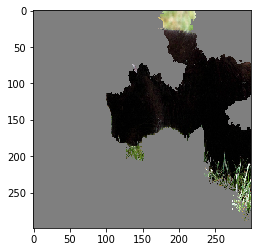

In [17]:
temp, mask = explanation.get_image_and_mask(label=106, positive_only=True, num_features=5, hide_rest=True)
# plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.imshow(temp / 2 + 0.5)

1 0
